
Netflix Dataset Analysis - Problem Statement 1
Content Trends Analysis for Strategic Recommendations

Import Libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Setup visualization style

In [19]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12,6)

Load Dataset

In [20]:
df = pd.read_csv("Netflix Dataset.csv")

# Quick look at dataset
print("Shape of Dataset:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing Values:\n", df.isnull().sum())

Shape of Dataset: (7789, 11)

Columns: ['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country', 'Release_Date', 'Rating', 'Duration', 'Type', 'Description']

Missing Values:
 Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64


Data Cleaning

In [21]:
# Convert Release_Date to datetime
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

# Extract Year
df['Year'] = df['Release_Date'].dt.year

# Handle missing values
df['Director'] = df['Director'].fillna("Unknown")
df['Cast'] = df['Cast'].fillna("Unknown")
df['Country'] = df['Country'].fillna("Unknown")
df['Rating'] = df['Rating'].fillna("Not Rated")

# Extract Main Genre (first genre listed in 'Type')
df['Main_Genre'] = df['Type'].apply(lambda x: x.split(",")[0].strip() if pd.notnull(x) else "Unknown")


Exploratory Data Analysis (EDA)

In [22]:
# Count of Movies vs TV Shows
print("\nCategory Distribution:\n", df['Category'].value_counts())

# Top Countries
print("\nTop 5 Countries:\n", df['Country'].value_counts().head(5))

# Dataset span (years)
print("\nDataset covers years from", df['Year'].min(), "to", df['Year'].max())


Category Distribution:
 Category
Movie      5379
TV Show    2410
Name: count, dtype: int64

Top 5 Countries:
 Country
United States     2556
India              923
Unknown            507
United Kingdom     397
Japan              226
Name: count, dtype: int64

Dataset covers years from 2008.0 to 2021.0


Analysis & Visualizations

In [52]:
# Show first 10 rows
display(df.head(5))

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year,Main_Genre
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,International TV Shows
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0,Action & Adventure
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0,Dramas


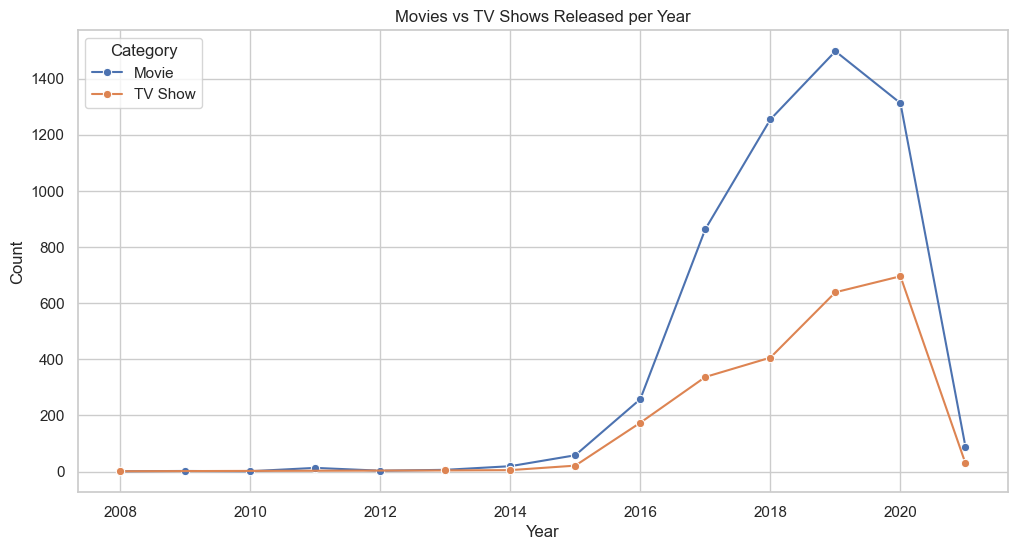

In [ ]:
#Line Chart – Movies vs. TV Shows released per year
content_trend = df.groupby(['Year', 'Category']).size().reset_index(name='Count')
sns.lineplot(data=content_trend, x='Year', y='Count', hue='Category', marker='o')
plt.title("Movies vs TV Shows Released per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

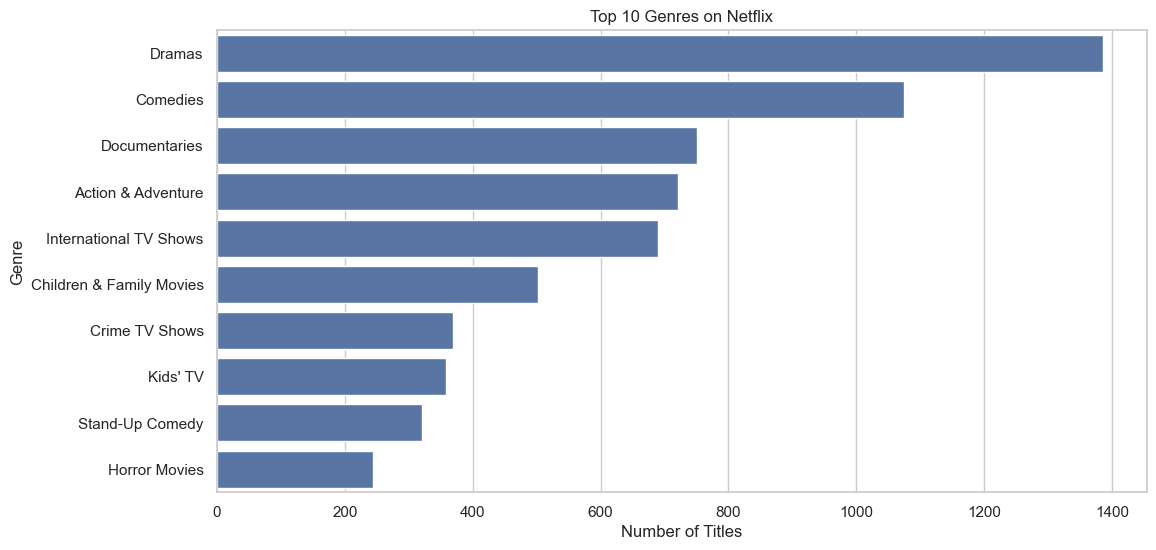

In [ ]:
#Bar Chart – Top 10 Genres
top_genres = df['Main_Genre'].value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()

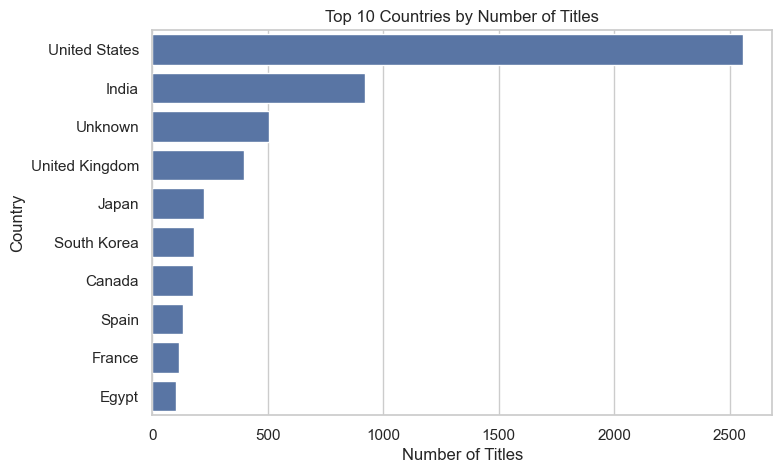

In [ ]:
#Top 10 Countries
if 'Country' in df.columns:
    top_countries = df['Country'].value_counts().head(10)
    plt.figure(figsize=(8,5))
    sns.barplot(x=top_countries.values, y=top_countries.index)
    plt.title('Top 10 Countries by Number of Titles')
    plt.xlabel('Number of Titles')
    plt.ylabel('Country')
    plt.show()
else:
    print("Column 'Country' not found.")

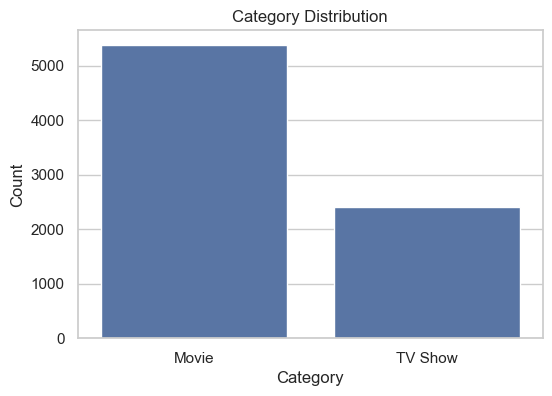

In [ ]:
#Category distribution (Movies vs TV Shows)
if 'Category' in df.columns:
    cat_counts = df['Category'].value_counts()
    plt.figure(figsize=(6,4))
    sns.barplot(x=cat_counts.index, y=cat_counts.values)
    plt.title('Category Distribution')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.show()
else:
    print("Column 'Category' not found.")

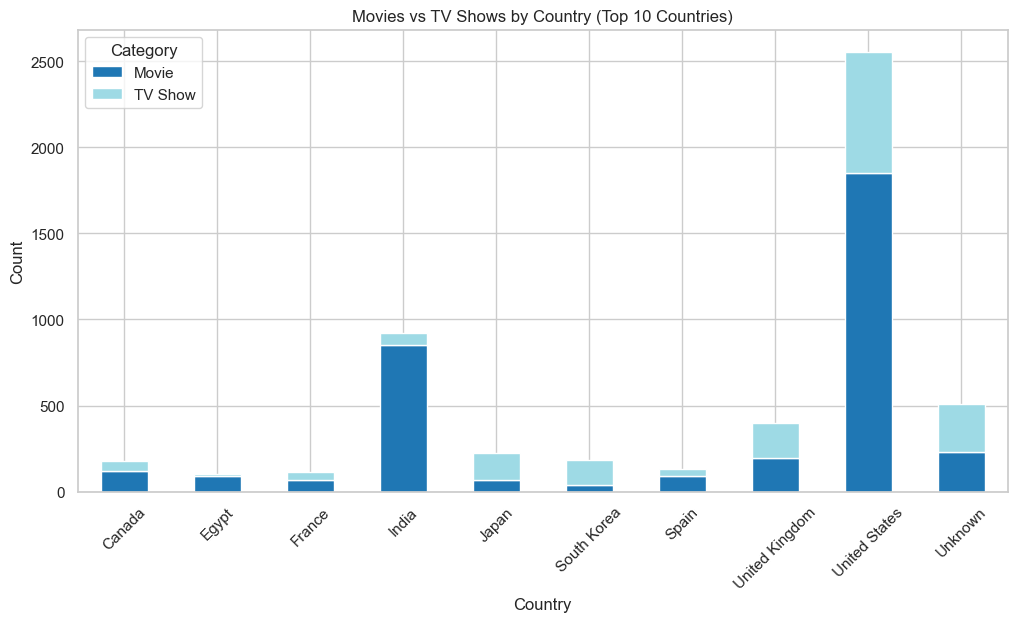

In [ ]:
#Stacked Bar Chart – Movies vs TV Shows per Country (Top 10 countries)
top_countries = df['Country'].value_counts().head(10).index
country_data = df[df['Country'].isin(top_countries)]
stacked = country_data.groupby(['Country', 'Category']).size().unstack(fill_value=0)
stacked.plot(kind='bar', stacked=True, figsize=(12,6), colormap="tab20")
plt.title("Movies vs TV Shows by Country (Top 10 Countries)")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Choropleth Map – Country-wise Content
country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']
fig = px.choropleth(country_counts, locations="Country", locationmode="country names",
                    color="Count", hover_name="Country",
                    color_continuous_scale="viridis", title="Netflix Content by Country")
fig.show()

C:\Users\ganes\AppData\Local\Temp\ipykernel_10100\1396793124.py:4: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



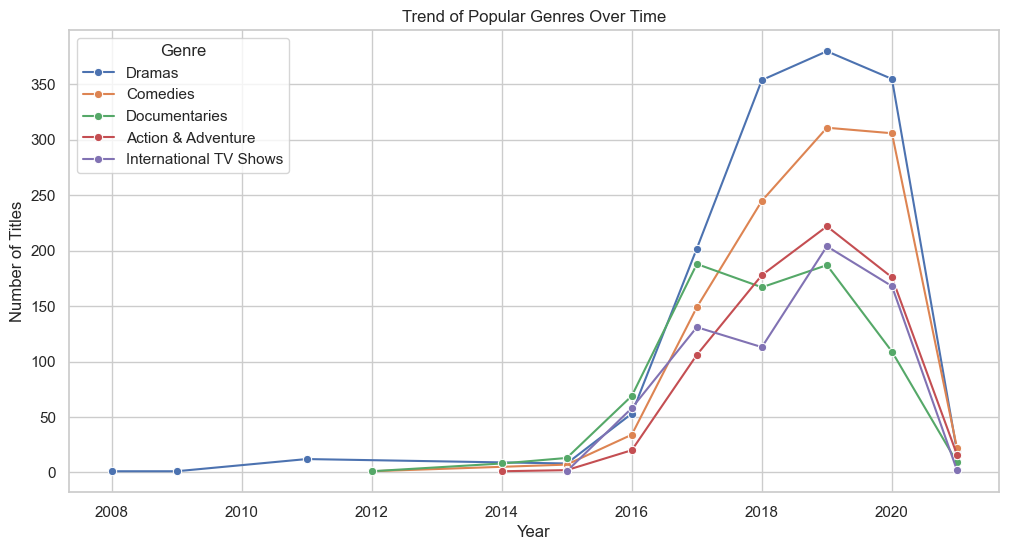

In [ ]:
#Trend Line – Growth of Popular Genres Over Time
popular_genres = df['Main_Genre'].value_counts().head(5).index
genre_trends = df[df['Main_Genre'].isin(popular_genres)].groupby(['Year','Main_Genre']).size().reset_index(name='Count')

sns.lineplot(data=genre_trends, x='Year', y='Count', hue='Main_Genre', marker="o")
plt.title("Trend of Popular Genres Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.legend(title="Genre")
plt.show()

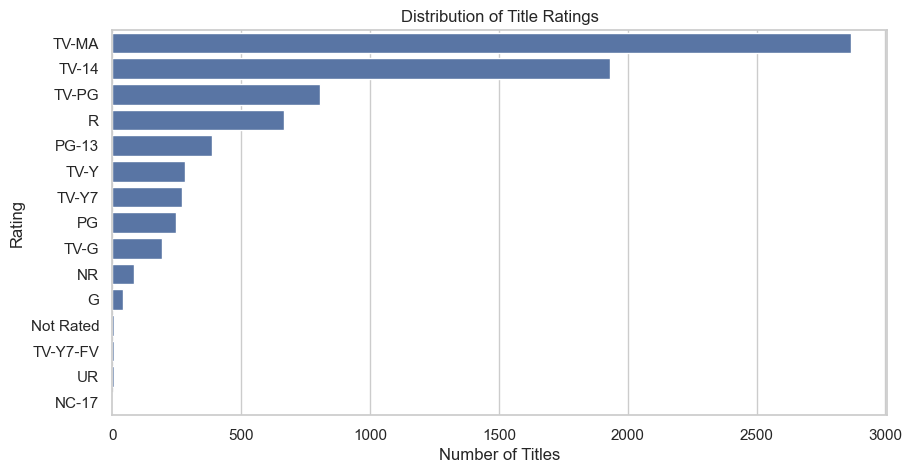

In [ ]:
#Rating distribution (safe-guard if Rating column exists)
if 'Rating' in df.columns:
    rating_counts = df['Rating'].value_counts().sort_values(ascending=False)
    plt.figure(figsize=(10,5))
    sns.barplot(x=rating_counts.values, y=rating_counts.index)
    plt.title('Distribution of Title Ratings')
    plt.xlabel('Number of Titles')
    plt.ylabel('Rating')
    plt.show()
else:
    print("Column 'Rating' not found in dataset. Skipping rating distribution plot.")

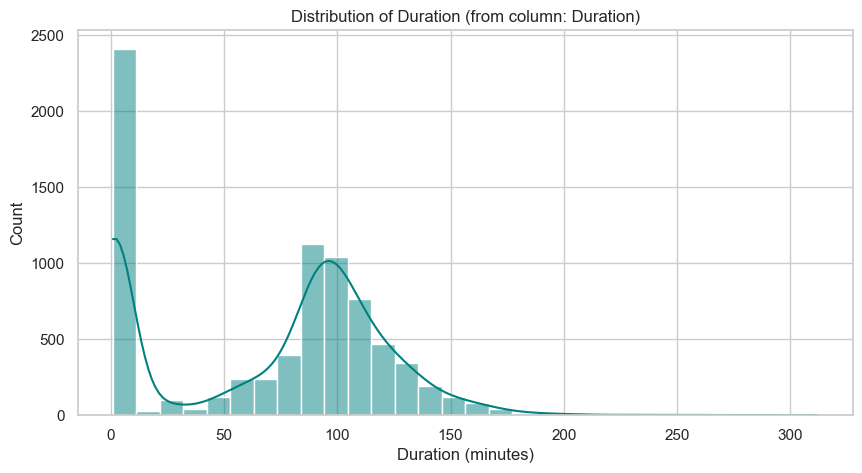

In [16]:
# Duration histogram (some datasets use 'Duration' or 'Runtime')
duration_col = None
for col in ['Duration', 'Runtime', 'Length']:
    if col in df.columns:
        duration_col = col
        break
if duration_col is not None:
    # Try to extract numeric minutes if values like '90 min' or '1 Season' exist
    dur_series = df[duration_col].astype(str).str.extract('(\d+)').astype(float)
    dur_series = dur_series[0].dropna()
    if not dur_series.empty:
        plt.figure(figsize=(10,5))
        sns.histplot(dur_series, bins=30, kde=True, color='teal')
        plt.title(f'Distribution of Duration (from column: {duration_col})')
        plt.xlabel('Duration (minutes)')
        plt.ylabel('Count')
        plt.show()
    else:
        print(f'No numeric durations could be extracted from column "{duration_col}".')
else:
    print('No duration-like column (Duration/Runtime/Length) found. Skipping duration histogram.')

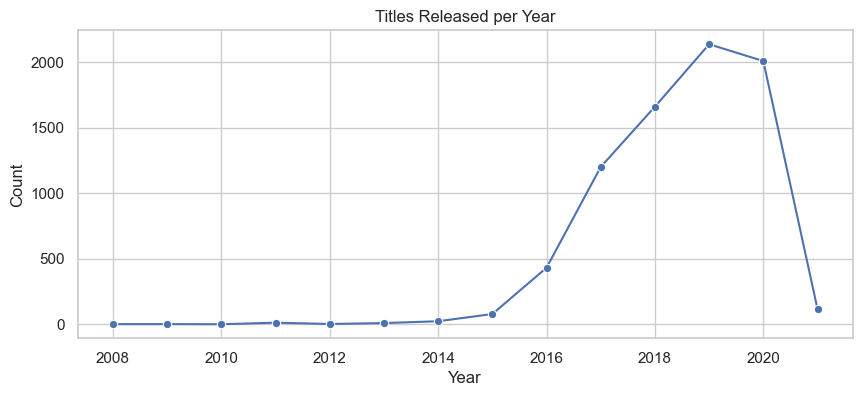

In [ ]:
# Releases per Year (line chart)
if 'Year' in df.columns:
    yearly = df.groupby('Year').size()
    plt.figure(figsize=(10,4))
    sns.lineplot(x=yearly.index, y=yearly.values, marker='o')
    plt.title('Titles Released per Year')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.show()
else:
    print("Column 'Year' not found.")

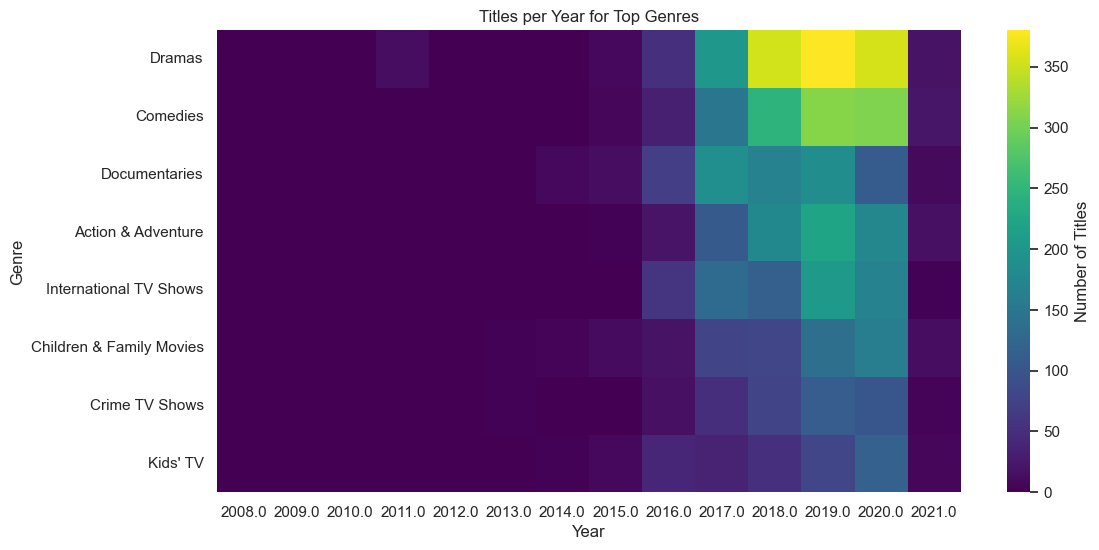

In [32]:
# Year vs Genre heatmap (counts)
if 'Year' in df.columns and 'Main_Genre' in df.columns:
    heat = df.dropna(subset=['Year','Main_Genre']).groupby(['Year','Main_Genre']).size().unstack(fill_value=0)
    # Limit to top genres to keep heatmap readable
    top_genres = df['Main_Genre'].value_counts().head(8).index
    heat = heat[top_genres] if not heat.empty else heat
    plt.figure(figsize=(12,6))
    sns.heatmap(heat.T, cmap='viridis', cbar_kws={'label':'Number of Titles'})
    plt.title('Titles per Year for Top Genres')
    plt.xlabel('Year')
    plt.ylabel('Genre')
    plt.show()
else:
    print("Required columns 'Year' and/or 'Main_Genre' missing. Skipping genre-year heatmap.")